In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Concatenate
from tensorflow.keras.models import Model

## Load Dataset

In [ ]:
anime_data = pd.read_csv('../dataset/anime.csv')
rating_complete_data = pd.read_csv('../dataset/rating_complete.csv')

In [6]:
# Melihat struktur data anime.csv
anime_data.head()

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


### Deskripsi variabel animelist.csv
Berisi informasi umum mengenai setiap anime yang tersedia di MyAnimeList.

- MAL_ID: ID anime dari MyAnimeList
- Name: Nama lengkap anime
- Score: Skor rata-rata yang diberikan kepada anime dari seluruh pengguna di database MyAnimeList
- Genres: Daftar genre anime, dipisahkan dengan koma (contoh: Action, Adventure, Comedy, Drama, Sci-Fi, Space).
- English name: Nama lengkap anime dalam bahasa Inggris
- Japanese name: Nama lengkap anime dalam bahasa Jepang
- Type: Jenis anime, seperti TV, movie, OVA, dan lain sebagainya.
- Episodes: Jumlah episode dari anime tersebut.
- Aired: Tanggal siaran anime.
- Premiered: Musim tayang perdana.
- Producers: Daftar produser anime.
- Licensors: Daftar pemberi lisensi anime.
- Studios: Daftar studio yang memproduksi anime.
- Source: Sumber asli cerita anime, misalnya Manga, Light novel, dan lain sebagainya.
- Duration: Durasi tiap episode anime, atau movie anime.
- Rating: Klasifikasi usia anime.
- Ranked: Peringkat berdasarkan skor rata-rata
- Popularity: Peringkat berdasarkan jumlah pengguna yang menambahkan anime ke daftar mereka.
- Members: Jumlah anggota komunitas yang ada dalam grup anime tersebut.
- Favorites: Jumlah pengguna yang menandai anime sebagai "favorit".
- Watching: Jumlah pengguna yang sedang menonton anime.
- Completed: Jumlah pengguna yang telah menyelesaikan menonton anime.
- On-Hold: Jumlah pengguna yang menunda menonton anime.
- Dropped: Jumlah pengguna yang berhenti menonton anime.
- Plan to Watch: Jumlah pengguna yang berencana menonton anime.
- Score-1 - Score-10: Jumlah pengguna yang memberikan skor 1 sampai 10.

In [7]:
# Melihat struktur data rating_complete.csv
rating_complete_data.head()

,user_id,anime_id,rating
0,0,430,9
1,0,1004,5
2,0,3010,7
3,0,570,7
4,0,2762,9


### Deskripsi variabel rating_complete.csv
Merupakan subset dari animelist.csv, hanya mencakup anime yang sudah selesai ditonton oleh pengguna (watching_status==2), dan memberinya skor (score!=0)

- user_id: ID pengguna yang dihasilkan secara acak dan tidak dapat diidentifikasi.
- anime_id: ID anime dari MyAnimeList yang telah dinilai oleh pengguna.
- rating: Rating atau skor yang diberikan oleh pengguna untuk anime tersebut.

Data yang akan digunakan pada proyek ini adalah `anime_data`, dan `rating_complete_data`. Maka, definisikan ulang `rating_complete_data` menjadi variable `users_data` agar lebih mudah dimengerti dan sesuai konteks.

In [8]:
users_data = rating_complete_data.copy()    
users_data.head()

,user_id,anime_id,rating
0,0,430,9
1,0,1004,5
2,0,3010,7
3,0,570,7
4,0,2762,9


## EDA

In [9]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57633278 entries, 0 to 57633277
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 1.3 GB


In [10]:
users_data.shape

(57633278, 3)

In [11]:
anime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MAL_ID         17562 non-null  int64 
 1   Name           17562 non-null  object
 2   Score          17562 non-null  object
 3   Genres         17562 non-null  object
 4   English name   17562 non-null  object
 5   Japanese name  17562 non-null  object
 6   Type           17562 non-null  object
 7   Episodes       17562 non-null  object
 8   Aired          17562 non-null  object
 9   Premiered      17562 non-null  object
 10  Producers      17562 non-null  object
 11  Licensors      17562 non-null  object
 12  Studios        17562 non-null  object
 13  Source         17562 non-null  object
 14  Duration       17562 non-null  object
 15  Rating         17562 non-null  object
 16  Ranked         17562 non-null  object
 17  Popularity     17562 non-null  int64 
 18  Members        17562 non-n

Dari output di atas terlihat ada beberapa kolom yang memiliki tidak yang sesuai. Hal tersebut akan diperbaiki pada tahap data cleaning.

### Top 10 Anime Terpopuler

In [12]:
# Filter untuk mengabaikan anime dengan nilai Popularity = 0
popularity_data = anime_data[anime_data['Popularity'] > 0]

# Mengurutkan berdasarkan Popularity
popularity_sorted = popularity_data.sort_values(by='Popularity', ascending=True)

# Menampilkan 10 anime teratas
top_10_anime = popularity_sorted[['Name', 'Genres', 'Score', 'Popularity']].head(10)

top_10_anime

,Name,Genres,Score,Popularity
1393,Death Note,"Mystery, Police, Psychological, Supernatural, ...",8.63,1
7449,Shingeki no Kyojin,"Action, Military, Mystery, Super Power, Drama,...",8.48,2
3971,Fullmetal Alchemist: Brotherhood,"Action, Military, Adventure, Comedy, Drama, Ma...",9.19,3
6614,Sword Art Online,"Action, Game, Adventure, Romance, Fantasy",7.25,4
10451,One Punch Man,"Action, Sci-Fi, Comedy, Parody, Super Power, S...",8.57,5
11185,Boku no Hero Academia,"Action, Comedy, School, Shounen, Super Power",8.11,6
8646,Tokyo Ghoul,"Action, Mystery, Horror, Psychological, Supern...",7.81,7
10,Naruto,"Action, Adventure, Comedy, Super Power, Martia...",7.91,8
5683,Steins;Gate,"Thriller, Sci-Fi",9.11,9
8148,No Game No Life,"Game, Adventure, Comedy, Supernatural, Ecchi, ...",8.2,10


Dari hasil di atas, anime Death Note menempati posisi pertama sebagai anime terpopuler, diikitu Shingeki no Kyojin di posisi kedua, dan Fullmetal Alchemist: Brotherhood di posisi ketiga.

### Top 10 Anime Terfavorit

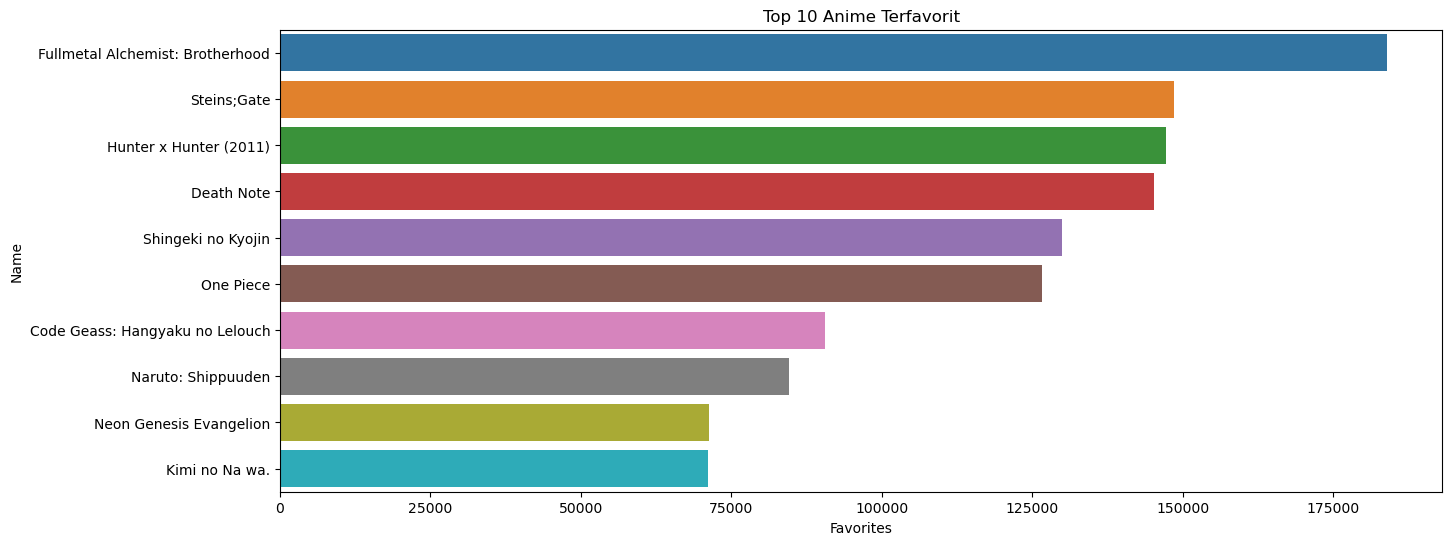

In [13]:
favorites_sorted = anime_data.sort_values(by='Favorites', ascending=False)
top_10_favorite_anime = favorites_sorted[['Name', 'Favorites']].head(10)

plt.figure(figsize=(15,6))
sns.barplot(x=top_10_favorite_anime['Favorites'], y=top_10_favorite_anime['Name'])
plt.title("Top 10 Anime Terfavorit")
plt.show()


Sedangkan, untuk anime terfavorit di posisi pertama adalah Fullmetal Alchemist: Brotherhood, diikuti Steins;Gate, lalu Hunter x Hunter (2020).

### Distribusi Genre

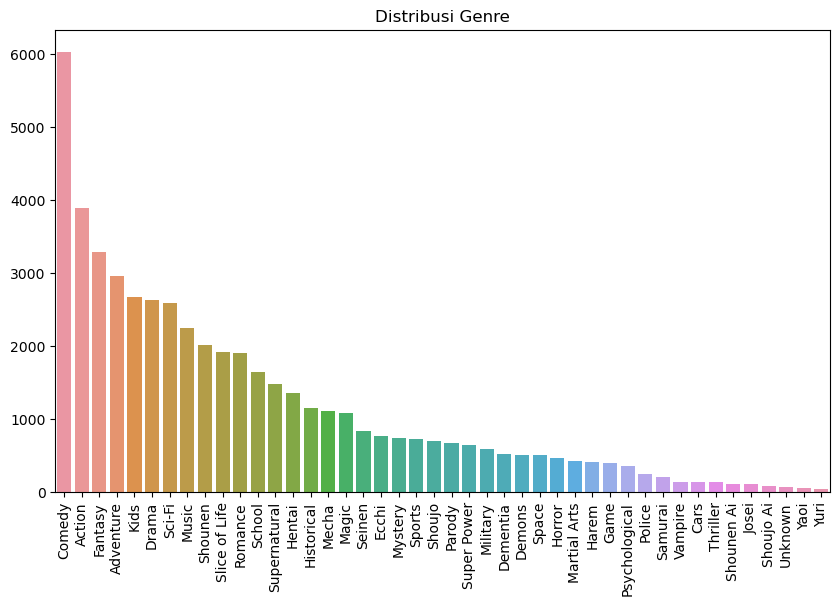

In [14]:
# Menghitung frekuensi genre
genres = ','.join(anime_data['Genres'].dropna()).split(',')
genre_count = Counter([genre.strip() for genre in genres])

# Mengurutkan genre berdasarkan frekuensi secara ascending
sorted_genre_count = dict(sorted(genre_count.items(), key=lambda item: item[1], reverse=True))

plt.figure(figsize=(10,6))
sns.barplot(x=list(sorted_genre_count.keys()), y=list(sorted_genre_count.values()))
plt.xticks(rotation=90)
plt.title("Distribusi Genre")
plt.show()

Genre paling banyak pada data ini adalah Comedy yang mencapai 6000 anime, diikuti genre Action sebanyak sekitar 3900, dan Fantasy sebanyak sekitar 3500

### Distribusi Rating Pengguna

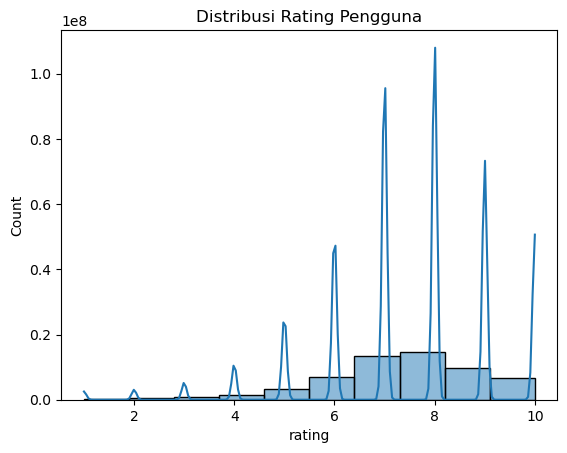

In [15]:
sns.histplot(users_data['rating'], bins=10, kde=True)
plt.title("Distribusi Rating Pengguna")
plt.show()

Distribusi rating yang diberikan berada pada rantang 5 hingga 10. Hanya sedikit pengguna yang memberikan rating dibawah 5.

## Data Preparation

### 1. Data Cleaning

#### 1.1 Mengubah Tipe Data Yang Tidak Sesuai

Kolom Ranked, Episodes, dan kolom Score-1 sampai Score-10 saat ini bertipe data object. Kita akan mengubah tipe datanya menjadi integer. Selama proses ini, nilai yang tidak valid, seperti Unknown, akan diganti dengan 0.

Untuk kolom Score, kita akan menghitung rata-rata dari nilai di kolom Score-1 sampai Score-10. Nilai Unknown di kolom-kolom tersebut akan diubah menjadi 0, dan kolom Score akan diubah menjadi float karena ini merupakan kolom yang berisi rata-rata. Rata-rata skor untuk kolom Score akan dihitung dengan menggunakan rumus berikut:

$$\text{Score} = \frac{1 \cdot \text{Score-1} + 2 \cdot \text{Score-2} + \ldots + 10 \cdot \text{Score-10}}{\text{Score-1} + \text{Score-2} + \ldots + \text{Score-10}}$$


In [5]:
# List kolom Score-1 sampai Score-10
score_columns = [f'Score-{i}' for i in range(1, 11)]

# Ubah 'Unknown' dengan 0 untuk kolom Score-1 sampai Score-10
for column in score_columns:
    anime_data[column] = anime_data[column].replace('Unknown', 0)
    anime_data[column] = pd.to_numeric(anime_data[column], errors='coerce').fillna(0)

# Hitung skor rata-rata dari Skor-1 hingga Skor-10 hanya untuk baris yang Skornya 'Unknown'
unknown_score_mask = anime_data['Score'] == 'Unknown'

# Hitung score mean
anime_data.loc[unknown_score_mask, 'Score'] = ((
    anime_data.loc[unknown_score_mask, score_columns] * [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).sum(axis=1) /
    anime_data.loc[unknown_score_mask, score_columns].sum(axis=1)
)

# Convert Score column to numeric and handle any remaining unknowns
# Convert kolom Score ke numeric dan isi nilai NaN dengan 0
anime_data['Score'] = pd.to_numeric(anime_data['Score'], errors='coerce').fillna(0)

# Verify the changes
anime_data[['Score'] + score_columns].head()


,Score,Score-1,Score-2,Score-3,Score-4,Score-5,Score-6,Score-7,Score-8,Score-9,Score-10
0,8.78,1580.0,741.0,1357.0,3184.0,8904.0,20688.0,62330.0,131625.0,182126.0,229170.0
1,8.39,379.0,109.0,221.0,577.0,1877.0,5805.0,22632.0,49505.0,49201.0,30043.0
2,8.24,533.0,316.0,664.0,1965.0,5838.0,15376.0,49432.0,86142.0,75651.0,50229.0
3,7.27,131.0,164.0,353.0,1083.0,2920.0,5709.0,11618.0,10128.0,4806.0,2182.0
4,6.98,27.0,50.0,83.0,265.0,634.0,1068.0,1713.0,1242.0,529.0,312.0


In [17]:
anime_data['Score'].dtypes

dtype('float64')

#### 1.2 Cek Missing Values

In [18]:
print("Missing pada data anime:")
print(anime_data.isnull().sum())


Missing pada data anime:
MAL_ID           0
Name             0
Score            0
Genres           0
English name     0
Japanese name    0
Type             0
Episodes         0
Aired            0
Premiered        0
Producers        0
Licensors        0
Studios          0
Source           0
Duration         0
Rating           0
Ranked           0
Popularity       0
Members          0
Favorites        0
Watching         0
Completed        0
On-Hold          0
Dropped          0
Plan to Watch    0
Score-10         0
Score-9          0
Score-8          0
Score-7          0
Score-6          0
Score-5          0
Score-4          0
Score-3          0
Score-2          0
Score-1          0
dtype: int64


In [19]:
print("Missing values pada data user:")
print(users_data.isnull().sum())

Missing values pada data user:
user_id     0
anime_id    0
rating      0
dtype: int64


Tidak terdapat missing value pada `anime_data` dan `anime_list_data`

#### 1.3 Cek Duplicate Values

In [20]:
print("Duplicate values pada data anime:")
print(anime_data.duplicated().sum())

Duplicate values pada data anime:
0


In [21]:
print("Duplicate values pada data user:")
print(users_data.duplicated().sum())

Duplicate values pada data user:
0


Tidak terdapat data duplikat pada kedua data di atas

## Modeling

### Content-Based Filtering Dengan Cosine Similarity

#### TF-IDF Vectorizer


In [6]:
# Inisialisasi TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(tokenizer=lambda x: x.split(', '))

# Fit dan transform kolom 'Genres' menjadi matriks TF-IDF
genre_tfidf_matrix = tfidf_vectorizer.fit_transform(anime_data['Genres'])

# Lihat nama genre yang diubah menjadi fitur (kolom-kolom dalam TF-IDF)
genre_feature_names = tfidf_vectorizer.get_feature_names_out()

# Konversi hasilnya menjadi DataFrame agar lebih mudah dipahami
tfidf_genre_df = pd.DataFrame(genre_tfidf_matrix.toarray(), columns=genre_feature_names)

/Users/fajar/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
# Pilih kolom yang akan disertakan dalam anime yang sudah berisi genre yang sudah diproses TF-IDF
columns_to_keep = ['MAL_ID', 'Name', 'Genres']

# Simpan data anime yang hanya berisi kolom-kolom yang telah dipilih
anime_data_dump = anime_data[columns_to_keep]

anime_data_dump.reset_index(drop=True, inplace=True)
tfidf_genre_df.reset_index(drop=True, inplace=True)

anime_tfidf_df = pd.concat([anime_data_dump, tfidf_genre_df], axis=1)

In [8]:
anime_tfidf_df.head()

,MAL_ID,Name,Genres,action,adventure,cars,comedy,dementia,demons,drama,...,slice of life,space,sports,super power,supernatural,thriller,unknown,vampire,yaoi,yuri
0,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",0.334820,0.371356,0.0,0.276259,0.0,0.0,0.387558,...,0.0,0.609782,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,5,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space",0.319565,0.000000,0.0,0.000000,0.0,0.0,0.369900,...,0.0,0.582000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,6,Trigun,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",0.372624,0.413285,0.0,0.307451,0.0,0.0,0.431316,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,7,Witch Hunter Robin,"Action, Mystery, Police, Supernatural, Drama, ...",0.269951,0.000000,0.0,0.000000,0.0,0.0,0.312471,...,0.0,0.000000,0.0,0.0,0.373954,0.0,0.0,0.0,0.0,0.0
4,8,Bouken Ou Beet,"Adventure, Fantasy, Shounen, Supernatural",0.000000,0.457134,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.570949,0.0,0.0,0.0,0.0,0.0


#### Cosine Similarity Matrix

In [12]:
similarity_matrix = cosine_similarity(anime_tfidf_df.drop(columns=['MAL_ID', 'Name', 'Genres']))

In [27]:
anime_tfidf_df[['MAL_ID', 'Name', 'Genres']].head(15)

,MAL_ID,Name,Genres
0,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space"
1,5,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space"
2,6,Trigun,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen"
3,7,Witch Hunter Robin,"Action, Mystery, Police, Supernatural, Drama, ..."
4,8,Bouken Ou Beet,"Adventure, Fantasy, Shounen, Supernatural"
5,15,Eyeshield 21,"Action, Sports, Comedy, Shounen"
6,16,Hachimitsu to Clover,"Comedy, Drama, Josei, Romance, Slice of Life"
7,17,Hungry Heart: Wild Striker,"Slice of Life, Comedy, Sports, Shounen"
8,18,Initial D Fourth Stage,"Action, Cars, Sports, Drama, Seinen"
9,19,Monster,"Drama, Horror, Mystery, Police, Psychological,..."


#### Mendapatkan Top-N Recommendations

In [14]:
def recommend_anime(anime_id, num_recommendations=10):
    idx = anime_data[anime_data['MAL_ID'] == anime_id].index[0]
    sim_scores = list(enumerate(similarity_matrix[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_indices = [i[0] for i in sim_scores[1:num_recommendations + 1]]
    
    return anime_data.iloc[sim_indices][['MAL_ID', 'Name', 'Score', 'Genres']]

# Menampilkan rekomendasi anime
recommended_anime = recommend_anime(anime_id=20)

# Menentukan relevansi berdasarkan rating > 7
recommended_anime['Relevance'] = recommended_anime['Score'] > 6.0

# Menampilkan rekomendasi dan relevansi
print("Top 10 Rekomendasi Anime")
recommended_anime

Top 10 Rekomendasi Anime


,MAL_ID,Name,Score,Genres,Relevance
1574,1735,Naruto: Shippuuden,8.16,"Action, Adventure, Comedy, Super Power, Martia...",True
12802,35072,Boruto: Jump Festa 2016 Special,6.22,"Action, Adventure, Comedy, Super Power, Martia...",True
214,238,Rekka no Honoo,7.36,"Action, Adventure, Martial Arts, Shounen, Supe...",True
6319,10686,Naruto: Honoo no Chuunin Shiken! Naruto vs. Ko...,7.16,"Action, Adventure, Martial Arts, Shounen, Supe...",True
7021,13667,Naruto: Shippuuden Movie 6 - Road to Ninja,7.67,"Action, Adventure, Super Power, Martial Arts, ...",True
12492,34566,Boruto: Naruto Next Generations,5.81,"Action, Adventure, Super Power, Martial Arts, ...",False
734,813,Dragon Ball Z,8.16,"Action, Adventure, Comedy, Fantasy, Martial Ar...",True
819,904,Dragon Ball Z Movie 11: Super Senshi Gekiha!! ...,5.90,"Action, Adventure, Comedy, Fantasy, Martial Ar...",False
892,987,Dragon Ball GT: Gokuu Gaiden! Yuuki no Akashi ...,6.54,"Action, Adventure, Comedy, Super Power, Martia...",True
4426,6033,Dragon Ball Kai,7.73,"Action, Adventure, Comedy, Fantasy, Martial Ar...",True


#### Evaluasi

Metrik evaluasi menggunakan Precission

In [15]:
# Menghitung Precision
relevant_recommendations = recommended_anime[recommended_anime['Relevance'] == True]
precision = len(relevant_recommendations) / len(recommended_anime)
print(f"\nPrecision: {precision:.2f}")


Precision: 0.80


### Collaborative Filtering dengan Neural Network

#### 1. Data Preparation Untuk Model Collaborative Filtering

##### 1.1 Pengambilan Sampel Data

Karena keterbatasan sumber daya, pada pemodelan ini hanya akan menggunakan 100.000 sample data **users**. Ini sudah cukup untuk menghasilkan model CF yang baik.

In [60]:
users_data_subset = users_data.sample(n=100000, random_state=9)

##### 1.2 Encoding user_id dan anime_id

In [61]:
# Mengubah user_id dan anime_id menjadi unique list
user_ids = users_data_subset['user_id'].unique().tolist()
anime_ids = users_data_subset['anime_id'].unique().tolist()

# Encoding user_id dan anime_id
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
anime_to_anime_encoded = {x: i for i, x in enumerate(anime_ids)}

# Mapping hasil encoding ke dataframe
users_data_subset['user_encoded'] = users_data_subset['user_id'].map(user_to_user_encoded)
users_data_subset['anime_encoded'] = users_data_subset['anime_id'].map(anime_to_anime_encoded)

users_data_subset.head()

,user_id,anime_id,rating,user_encoded,anime_encoded
45364020,278331,1313,6,0,0
25154541,154964,5162,8,1,1
5906088,36251,35120,7,2,2
4958325,30401,3588,10,3,3
30267658,186256,20,8,4,4


##### 1.3 Normalisasi Rating Ke Rentang 0-1

In [62]:
min_rating = users_data_subset['rating'].min()
max_rating = users_data_subset['rating'].max()

# Normalisasi kolom rating ke rentang 0-1, dan simpan pada kolom baru yaitu 'normalized_rating'
users_data_subset['normalized_rating'] = users_data_subset['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating))

In [63]:
users_data_subset.head()

,user_id,anime_id,rating,user_encoded,anime_encoded,normalized_rating
45364020,278331,1313,6,0,0,0.555556
25154541,154964,5162,8,1,1,0.777778
5906088,36251,35120,7,2,2,0.666667
4958325,30401,3588,10,3,3,1.000000
30267658,186256,20,8,4,4,0.777778


##### 1.4 Split Data menjadi Data Training (70%), Data Validation (20%) dan Data Test (10%)

In [67]:
X = users_data_subset[['user_encoded', 'anime_encoded']]
y = users_data_subset['normalized_rating'].values

# Pertama, bagi data menjadi 80% untuk training + validation dan 20% untuk testing
X_train_val, X_val, y_train_val, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Kedua, bagi data training + validation menjadi 70% untuk training dan 10% untuk validation
X_train, X_test, y_train, y_test = train_test_split(X_train_val, y_train_val, test_size=0.125, random_state=42)

# Menampilkan ukuran data untuk memastikan pembagian
print(f"Training data size: {X_train.shape[0]} samples")
print(f"Validation data size: {X_val.shape[0]} samples")
print(f"Testing data size: {X_test.shape[0]} samples")

Training data size: 70000 samples
Validation data size: 20000 samples
Testing data size: 10000 samples


#### Training

In [35]:
class NeuralCollaborativeFiltering(tf.keras.Model):
    def __init__(self, num_users, num_items, embedding_size, dropout_rate=0.3, mlp_hidden_layers=[64, 32, 16], **kwargs):
        super(NeuralCollaborativeFiltering, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_items = num_items
        self.embedding_size = embedding_size
        self.dropout_rate = dropout_rate
        self.mlp_hidden_layers = mlp_hidden_layers
        
        # Embedding layer untuk user
        self.user_embedding = tf.keras.layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=tf.keras.regularizers.l2(1e-6)
        )
        
        # Bias embedding untuk user
        self.user_bias = tf.keras.layers.Embedding(num_users, 1)
        
        # Embedding layer untuk item
        self.item_embedding = tf.keras.layers.Embedding(
            num_items,
            embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=tf.keras.regularizers.l2(1e-6)
        )
        
        # Bias embedding untuk item
        self.item_bias = tf.keras.layers.Embedding(num_items, 1)
        
        # Dropout layer
        self.dropout = tf.keras.layers.Dropout(rate=self.dropout_rate)

        # MLP layers (fully connected layers)
        self.mlp_layers = []
        for units in mlp_hidden_layers:
            self.mlp_layers.append(tf.keras.layers.Dense(units, activation='relu'))
            self.mlp_layers.append(tf.keras.layers.Dropout(self.dropout_rate))
        
        # Final prediction layer
        self.final_layer = tf.keras.layers.Dense(1, activation='sigmoid')
    
    def call(self, inputs):
        # Mengambil vector embedding untuk user dan item dari input
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        item_vector = self.item_embedding(inputs[:, 1])
        item_bias = self.item_bias(inputs[:, 1])
        
        # Menggunakan dropout pada user dan item vector
        user_vector = self.dropout(user_vector)
        item_vector = self.dropout(item_vector)
        
        # Menggabungkan vektor embedding user dan item
        concatenated = tf.concat([user_vector, item_vector], axis=-1)
        
        # Melewati concatenated vector melalui MLP
        x = concatenated
        for layer in self.mlp_layers:
            x = layer(x)
        
        # Menghitung dot product untuk interaksi linier
        dot_user_item = tf.reduce_sum(tf.multiply(user_vector, item_vector), axis=1, keepdims=True)
        
        # Menambahkan bias
        x = dot_user_item + user_bias + item_bias
        
        # Melewati final layer untuk prediksi akhir
        x = self.final_layer(x)
        
        return x

In [36]:
# Menghitung Jumlah User dan Item
num_users = users_data_subset['user_encoded'].nunique()
num_items = users_data_subset['anime_encoded'].nunique()

In [ ]:
model = NeuralCollaborativeFiltering(num_users, num_items, 50)

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [ ]:
history = model.fit(
    X_train, 
    y_train,
    batch_size=64,
    epochs=20,
    validation_data=(X_val, y_val),
)

Epoch 1/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 30s 27ms/step - loss: 0.6872 - root_mean_squared_error: 0.2870 - val_loss: 0.6685 - val_root_mean_squared_error: 0.2722
Epoch 2/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 31s 28ms/step - loss: 0.6632 - root_mean_squared_error: 0.2649 - val_loss: 0.6470 - val_root_mean_squared_error: 0.2518
Epoch 3/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 32s 29ms/step - loss: 0.6419 - root_mean_squared_error: 0.2454 - val_loss: 0.6289 - val_root_mean_squared_error: 0.2335
Epoch 4/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 29s 26ms/step - loss: 0.6240 - root_mean_squared_error: 0.2255 - val_loss: 0.6141 - val_root_mean_squared_error: 0.2177
Epoch 5/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 28s 26ms/step - loss: 0.6082 - root_mean_squared_error: 0.2088 - val_loss: 0.6026 - val_root_mean_squared_error: 0.2048
Epoch 6/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 28s 26ms/step - loss: 0.5941 - root_mean_squared_error: 0.1935 - val_loss: 0.5941 - val_root_mean_squared_error: 0.1949
Epoch 7/20
1094/1094 ━━━━━━━

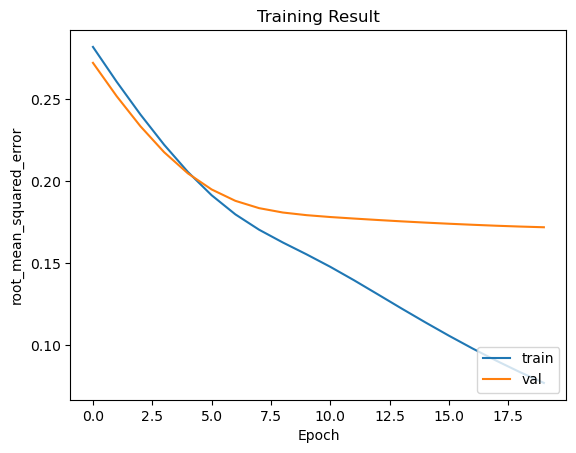

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Training Result')
plt.xlabel('Epoch')
plt.ylabel('root_mean_squared_error')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

#### Mendapatkan Top-N Recommendations

In [ ]:
# Pilih user secara acak
random_user_id = random.choice(users_data_subset['user_id'].unique())
print(f"Showing recommendations for user ID: {random_user_id}")
print("===========================")
print("Top 10 Anime Recommendations")
print("===========================")

# Mengambil index encoded untuk user acak
user_encoded = user_to_user_encoded[random_user_id]

predicted_ratings = []

for anime_id in anime_ids:
    anime_encoded = anime_to_anime_encoded[anime_id]
    
    # Gabungkan input pengguna dan item
    input_data = np.array([[user_encoded, anime_encoded]])

    # Prediksi rating
    predicted_rating = model.predict(input_data, verbose=0)[0][0]
    
    predicted_ratings.append((anime_id, predicted_rating))

# Urutkan berdasarkan rating tertinggi
predicted_ratings.sort(key=lambda x: x[1], reverse=True)

# Ambil top 10 anime berdasarkan prediksi rating
top_10_anime_ids = [anime_id for anime_id, _ in predicted_ratings[:10]]

# Tampilkan nama-nama anime yang ada di top 10
for anime_id in top_10_anime_ids:
    anime_name = anime_data.loc[anime_data['MAL_ID'] == anime_id, 'Name'].values[0]
    print(anime_name)

Showing recommendations for user ID: 18802
Top 10 Anime Recommendations
Fullmetal Alchemist: Brotherhood
Hunter x Hunter (2011)
Code Geass: Hangyaku no Lelouch
One Punch Man
Steins;Gate
Koe no Katachi
Code Geass: Hangyaku no Lelouch R2
Death Note
Sen to Chihiro no Kamikakushi
Shingeki no Kyojin Season 3 Part 2


### Evaluasi

Metrik evaluasi menggunakan Root Mean Squared Error (RMSE).

In [ ]:
# Evaluasi pada data test dengan RMSE
_, rmse_test = model.evaluate(X_test, y_test, batch_size=64)

print(f"Test RMSE: {rmse_test:.4f}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5772 - root_mean_squared_error: 0.1727
Test RMSE: 0.1728
